# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [4]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [9]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit_grouped = fitbit.groupby('Months_encoded').mean(numeric_only=True)
fitbit_grouped.head()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency
Months_encoded,,,,,,,,,,,,,,,,,,,,
1,2812.806452,9892.064516,7.912581,8.580645,573.702000,249.838710,27.548387,27.387097,1705.741935,310.516129,29.483871,17.193548,340.161290,4.916648,3.193548,0.677419,5.175269,79.535533,5.245699,79.545673
2,2600.100000,8922.866667,7.143667,9.666667,598.077133,214.933333,25.166667,25.033333,1833.033333,269.933333,24.366667,14.533333,294.600000,4.438867,2.933333,0.733333,4.498889,73.325942,4.605000,73.287582
3,2281.258065,10312.935484,9.184194,9.935484,490.865000,220.935484,13.096774,41.451613,2443.387097,242.290323,22.387097,13.483871,265.387097,5.706792,2.903226,0.741935,4.038172,70.799130,3.955914,70.782667
4,3030.800000,13079.033333,11.190667,11.566667,638.469700,293.866667,13.800000,48.866667,1710.333333,322.133333,35.500000,18.566667,357.766667,6.953556,3.100000,0.700000,5.368889,84.023962,5.293889,84.100439
5,2836.580645,10620.096774,8.799677,10.741935,654.149161,229.580645,28.258065,46.806452,3391.419355,353.612903,35.967742,21.677419,394.935484,5.467864,3.193548,0.677419,5.893548,86.669604,5.638710,83.934522


In [12]:
fitbit_grouped = fitbit_grouped[['Steps']]
fitbit_grouped

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


In [13]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit_grouped_ww = fitbit.groupby('Work_or_Weekend').mean(numeric_only=True)
fitbit_grouped_ww.head()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Work_or_Weekend,,,,,,,,,,,,,,,,,,,,
0,2647.628571,10064.238095,8.175619,6.885714,530.831171,263.419048,22.628571,30.638095,1901.523810,267.495238,26.895238,15.609524,297.523810,5.080093,5.495238,4.458254,74.683679,4.606190,75.650482,6.447619
1,2779.122137,10144.572519,8.698817,13.664122,577.201076,225.580153,27.580153,37.759542,2101.305344,299.690840,28.454198,16.431298,330.889313,5.405192,2.015267,4.994847,77.035729,4.903626,76.307944,6.522901


In [14]:
fitbit_grouped_ww = fitbit_grouped_ww[['Steps']]
fitbit_grouped_ww

,Steps
Work_or_Weekend,
0,10064.238095
1,10144.572519


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [15]:
fitbit_scatter = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]
fitbit_scatter.head()

,Steps,Minutes Lightly Active,Minutes Very Active,Minutes Sedentary
0,905,46,0,1.355
1,18925,316,60,611.000
2,14228,226,77,602.000
3,6756,190,4,749.000
4,502,171,0,876.000


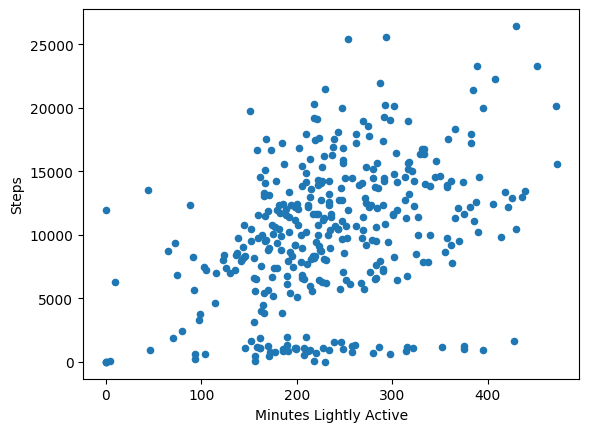

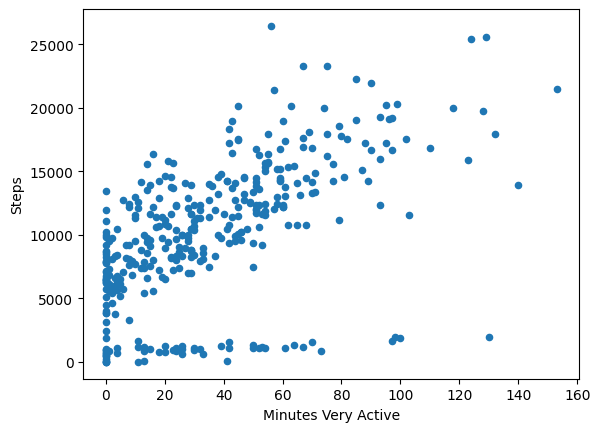

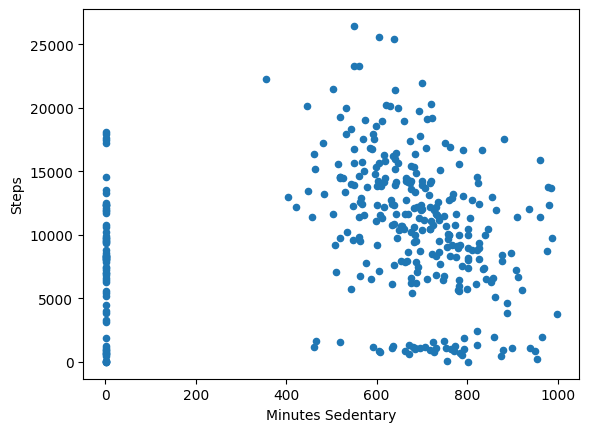

In [17]:
for e in fitbit_scatter:
    if e != 'Steps':
       fitbit_scatter.plot.scatter(x=e, y='Steps')

In [18]:
#Coooool

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here

In [ ]:
# CATEGORICAL VARIABLES
# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here

#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here